<a href="https://colab.research.google.com/github/umi-na/google_colab/blob/main/topic_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 #5: 데이터 기술 통계

Colab 실습 시작 전, 이 노트북의 **복사본을 자신의 구글 드라이브에 저장**함: Colab 메뉴에서 "File" >> "Save a Copy in Drive". "Save a Copy" 메뉴 선택 시 "Copy of topic#5.ipynb" 복사본이 구글 드라이브의 'Colab Notebook' 폴더에 저장됨. 그리고 본사본이 새 브라우저 창에 열림.

# 수업목표

* 데이터 필터링 복습 (토픽 4)

* 기술통계분석

* 데이터(변수)의 종류

* 기술통계분석 활용

# 수업 데이터 소개

* 타이타닉 탑슥객 데이터와 분포 데이터를 활용하겠음

* 각 데이터의 설명은 아래와 같음

## 타이타닉 탑습객 데이터

* 본 수업에서도 [타이타닉 탑습객 데이터](https://drive.google.com/drive/folders/1KpfVquLkXBRByHmpwCvxHYpbpj7sebki?usp=sharing)를 활용하겠음.

* 탑습객 데이터를 다운받아 구글 드라이브에 업로드하여 사용하면 됨

* 탑습객 데이터의 자세한 설명은 [Wk#3 코랩](https://colab.research.google.com/drive/1rn0JqKKVeagdFY-DriMhqIiU2drUeEAg?usp=sharing) 참조


### 구글 드라이브 마운트

* 구글 드라이브에 업로드한 데이터를 사용하기 위해 드라이브를 마운트함

* 아래 그림처럼 (1) => (2) 순으로 클릭하면 드라이브가 마운트됨(자세한 설명은 [Wk#1 코랩](https://colab.research.google.com/drive/1-28UPcDO68IGnwZ0SeuG_jnvMQ--oL6E?usp=sharing) 참조)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1L56f9PIcVxMCLjonPgqJl2PKzasw4TY8) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 구글 드라이브 폴더 경로 설정

* 아래 root_path의 스트링값은 파일이 있는 구글 드라이브 폴더 경로를 나타냄 

* 자신에게 맞게 구글 드라이브 폴더 경로를 변경하여 사용하면 됨

In [ ]:
root_path = '/content/drive/MyDrive/wk3_data'

* 아래 데이터는 타이타닉 데이터를 DataFrame으로 읽어와 보여주는 코드임

* 구글 드라이브 마운트 및 폴더 경로가 똑바로 설정되다면 오류 없이 실행됨


In [ ]:
import pandas as pd
from os import path

def getTitanicData():
  return pd.read_csv(path.join(root_path,'titanic.csv'))

df = getTitanicData()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,113803,53.1000,C123,S
4,5,0,3,male,35.0,373450,8.0500,NaN,S


## 분포 데이터

* 본 데이터를 여러 균등분포, 정규분포, 이할분포, 베르누이분포를 가지는 데이터를 포함함

* 각 분포 데이터는 난수 함수로 생성됨. 따라서 매번 생성 시 마다 데이터값이 달라짐. 그러나 분포 성질은 언제가 동일함 

* 예컨데, 균등분포 데이터를 생성하는 난수 함수(메소드) 실행 시 반환되는 데이터값을 언제나 다르나 언제나 균등분포 성질은 가지고 있음

### 데이터#1: 균등분포

* 데이터의 어떤 값을 무작위로 추출 시 각 데이터값이 추출될 확률이 모두 일정할 때 데이터는 균등분포를 따른다고 함

* scipy.stats 라이브러이의 uniform.rvs 메서드로 균등분포를 따르는 데이터를 생성 할 수 있음

In [ ]:
from scipy.stats import uniform

data_uniform = uniform.rvs(size=10000, loc = 10, scale=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

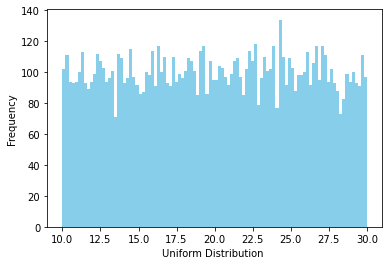

In [ ]:
import seaborn as sns

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

### 데이터#2: 정균분포

* 데이터의 어떤 값을 무작위로 추출 시 데이터값이 평균에 가까운 값이 추출될 확률이 가장 높고, 반대로 평균에서 멀어질 수록 일정하게 확률이 줄어들 때 데이터는 균등분포를 따른다고 함

* scipy.stats 라이브러이의 norm.rvs 메서드로 균등분포를 따르는 데이터를 생성 할 수 있음

In [ ]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000,loc=10,scale=1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

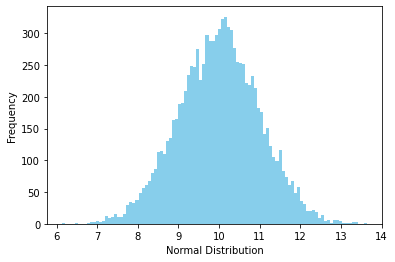

In [ ]:
import seaborn as sns

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


### 데이터#3: 베르누이분포

* 데이터의 어떤 값을 무작위로 추출 시 추출 가능한 데이터값이 두개 인 경우(True/False, 0/1) 데이터는 베르누이분포를 따른다고 함

* scipy.stats 라이브러이의 bernoulli.rvs 메서드로 베르누이분포를 따르는 데이터를 생성 할 수 있음

In [ ]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

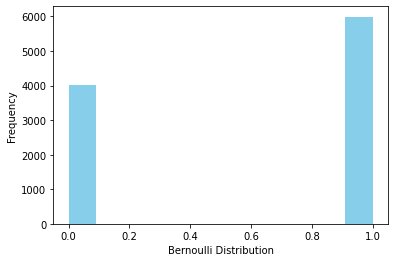

In [ ]:
import seaborn as sns

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

### 데이터#4: 이항분포

* 두 종류의 데이터값이 존재하는 데이터에서 무작이로 데이터를 추출할 때 나올 수 있는 모든 경우의 수를 기록한 데이터를 이항분포라고 함

* scipy.stats 라이브러이의 binom.rvs 메서드로 이항분포를 따르는 데이터를 생성 할 수 있음

In [ ]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

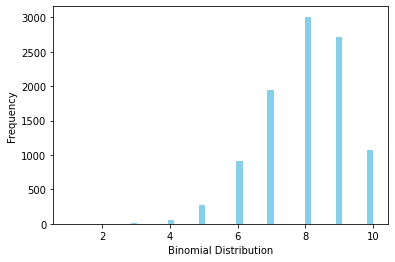

In [ ]:
import seaborn as sns

ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

### 분포 데이터프레임

In [ ]:
import pandas as pd
from os import path

def getDistributionData():
  return pd.DataFrame({
      "uniform":data_uniform,
      "normal":data_normal,
      "bern":data_bern,
      "binom":data_binom})

df = getDistributionData()
df.head()

,uniform,normal,bern,binom
0,26.031871,9.792524,1,9
1,17.735726,10.337655,1,10
2,13.516215,10.742905,1,8
3,17.111709,9.861952,0,8
4,29.261332,8.891675,1,7


# 데이터 필터링 복습

## 타이타닉 데이터 

* 타이나닉 데이터의 각 Row는 아래와 유사함

PassengerId| Survived| Pclass| Sex| Age| Ticket| Fare| Cabin| Embarked
---| ---| ---| ---| ---| ---| ---| ---| ---
0| 1| 0| 3| male| 22.0| A/5 21171| 7.25| NaN| S

* 타이나닉 데이터의 column 정보는 아래표와 같음

컬럼 이름|	설명|	컬럼값 설명
---| ---| ---
PassengerId| 탑승객 번호| 
Survived|	생존유무|	0 = 사망, 1 = 생존
pclass|	티켓 글래스|	1 = 1등석, 2 = 2등석, 3 = 3등석
Sex|	성별| Female = 여성, Male = 남성	
Age|	만 나이 | 태어난지 1년 미만으면(만 나이 < 0) 소수로 표현
Ticket|	티켓 번호|	
Fare|	티켓 가격|	
Cabin|	객실 번호|	
Embarked|	탑승 항구|	C = 셰르부르(프랑스 서북부 항구), Q = 퀸즈타운(아일랜드 남부의 항구), S = 사우샘프턴 (영국 남부 항구)


* 타이나틱 데이터의 첫 row 5개의 데이터는 아래와 같음


In [ ]:
df = getTitanicData()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,113803,53.1000,C123,S
4,5,0,3,male,35.0,373450,8.0500,NaN,S


## 조건문(Conditional Statement) 

* 비교 연산자를 활용하여 조건문을 만들수 있음. 사용 가능한 비교 연산자는 아래 표와 같음

* 비교 연산자는 두 피연산자 (e.g., A vs. B) 사이의 상대적인 크기를 판단함 

비교 연산자|	설명
---| ---
A **==** B|  A와 B는 **같다**
A **!=** B| A와 B는 **다르다**
A **<** B| A는 B 보다 **작다**
A **<=** B| A는 B 보다 **작거나 같다**
A **>** B| A는 B보다 **크다**
A **>=** B| A는 B보다 **크거나 같다** 

## 논리 연산자(Logical Operator)

* 논리 연산자를 두 조건문 사이에 넣어 조건문을 더 다양하게 만들 수 있음: e.g., (A == B) & (B != C)

* 논리 연산자로 다음 3가지를 사용할 수 있음: & (AND; 그리고), | (OR; 또는), ! (NOT; 아니다)

* 논리 연산자 사용예는 아래표와 같음


논리 연산자| 설명| 사용 예시| 설명
---| --- | --- | ---
& | (A == B) & (B != C) | 앞뒤 모든 조건문을 만족해야 참이됨 |A와 B는 같고 B는 C와 다르다
\| | (A == B) \| (B != C) | 앞뒤 조건문 중 한개만 만족하면 참이됨|A와 B는 같거나 B는 C와 다르다
! | !(A == B) | 조건문 거짓이면 참이됨 |A와 B는 같은 것이 아니다 (A와 B는 다르다)

## DataFrame[조건문]

* DataFrame[ ? ]에 참(True) 또는 거짓(False)을 반환하는 조건문을 넣어 필터링을 할 수 있음 (e.g., DataFrame[ 조건문 ])

* DataFrame[ 조건문 ]은 조건문이 True를 반환하는 Row만 보여줌 

* 아래 코드는 3등석에 탑승한 탑승객만 필터하여 보여줌

In [ ]:
df = getTitanicData()
df[(df.Pclass == 3)]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,male,35.0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,330877,8.4583,NaN,Q
7,8,0,3,male,2.0,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
882,883,0,3,female,22.0,7552,10.5167,NaN,S
884,885,0,3,male,25.0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,female,39.0,382652,29.1250,NaN,Q
888,889,0,3,female,NaN,W./C. 6607,23.4500,NaN,S


* 아래 코드는 3등석에 탑승하지 않은 탑승객만 필터하여 보여줌 (e.g., 1, 2등석 탑승객)

In [ ]:
df = getTitanicData()
df[(df.Pclass != 3)]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C
3,4,1,1,female,35.0,113803,53.1000,C123,S
6,7,0,1,male,54.0,17463,51.8625,E46,S
9,10,1,2,female,14.0,237736,30.0708,NaN,C
11,12,1,1,female,58.0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
880,881,1,2,female,25.0,230433,26.0000,NaN,S
883,884,0,2,male,28.0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,male,27.0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,112053,30.0000,B42,S


* 논리 연산자를 두 조건문 사이에 넣어 조건문을 더 다양하게 만들 수 있음

* 아래는 3등석에 탑승한 탑승객 중 생존한 탑승객만 필터하여 보여줌

In [ ]:
df = getTitanicData()
df[(df.Pclass == 3) & (df.Survived == 1)]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,female,27.0,347742,11.1333,NaN,S
10,11,1,3,female,4.0,PP 9549,16.7000,G6,S
19,20,1,3,female,NaN,2649,7.2250,NaN,C
22,23,1,3,female,15.0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...
838,839,1,3,male,32.0,1601,56.4958,NaN,S
855,856,1,3,female,18.0,392091,9.3500,NaN,S
858,859,1,3,female,24.0,2666,19.2583,NaN,C
869,870,1,3,male,4.0,347742,11.1333,NaN,S


* 아래 코드는 3등석에 탑승하지 않은 탑승객 중 생존한 탑승객만 필터하여 보여줌 (e.g., 1, 2등석 생존 탑승객)

In [ ]:
df = getTitanicData()
df[(df.Pclass != 3) & (df.Survived == 1)]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C
3,4,1,1,female,35.0,113803,53.1000,C123,S
9,10,1,2,female,14.0,237736,30.0708,NaN,C
11,12,1,1,female,58.0,113783,26.5500,C103,S
15,16,1,2,female,55.0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...
874,875,1,2,female,28.0,P/PP 3381,24.0000,NaN,C
879,880,1,1,female,56.0,11767,83.1583,C50,C
880,881,1,2,female,25.0,230433,26.0000,NaN,S
887,888,1,1,female,19.0,112053,30.0000,B42,S


## DataFrame.loc[조건문, 컬럼이름]

* DataFrame.loc[ ? ]에 조건문을 넣어 필터링을 할 수 있음 (e.g., DataFrame.loc[조건문]). DataFrame[ 조건문 ]과 같은 결과가 반환됨

* 그러나, DataFrame[ 조건문 ]과는 다르게 DataFrame.loc[ ?, ? ]에 조건문과 함께 컬럼이름을 넣어 필터 후 보여주고 싶은 column을 선택할 수 있음

In [ ]:
df = getTitanicData()
df.loc[(df.Pclass != 3) & (df.Survived == 1), ['PassengerId','Survived', 'Pclass']]

,PassengerId,Survived,Pclass
1,2,1,1
3,4,1,1
9,10,1,2
11,12,1,1
15,16,1,2
...,...,...,...
874,875,1,2
879,880,1,1
880,881,1,2
887,888,1,1


# 기술통계분석

* 데이터를 요약해서 나타내려면 기술통계량(descriptive statistics)을 보여주면 됨

* 기술통계량은 데이터를 수치로 요약해서 나타난 값을 의미함. 즉 데이터의 특성을 표현하여 데이터의 전반적이 형태를 알 수 있도록 하는 값임 

* 기술통계량에는 대표값(중심경향성, central tendency)이나 산포도(dispersion) 등이 있음

## 대표값 (중심경향성, central tendency)

* 대표값은 데이터가 어느 위치에 집중되어 있는지 나타내어 데이터를 하나의 대표적인 값으로 요약함

* 평균(mean), 중앙값(중위수, median), 최빈값(mode) 등의 대표값이 있음

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1dP8sTEBx36scF151OH6vz2_i_NNi6TSM) 

* 각 대표값에 대하여 설명하면서 분포 데이터를 활용하여 해당 대표값을 계산하여 보겠음

### 평균 (mean)

* 평균은 가장 많이 사용되는 대표값으로 데이터의 값들을 모두 더하고 이를 데이터의 개수로 나눈 값임

* 평균을 구하는 수식은 다음과 같음: $\bar{X} = \frac{\sum_{i=1}^{n}X_i}{n}$

* 단점으로는 이상치 (또는 특이값)에 영향을 많이 받음

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1KWx-qeLLsLy0oJYcqdT_mu8gOHRRU-J4) 


* 실제로 평균이 이상치에 영향을 많이 받는지 확인해 보겠음

In [ ]:
import numpy as np

data = np.array([1, 3, 4, 5, 9, 11])
data_with_outlier = np.array([1, 3, 4, 5, 9, 11, 100])

In [ ]:
data.mean()

5.5

In [ ]:
data_with_outlier.mean()

19.0

* DataFrame.mean() 메소드를 사용하면 개별 컬럼데이터의 평균을 계산할 수 있음

* 아래코드는 분포 데이터에 포함된 각 컴럼(e.g., 균등분포, 정규분포 등) 데이터의 평균을 계산함

In [ ]:
df = getDistributionData()
df.mean()

uniform    19.999134
normal      9.997152
bern        0.599100
binom       7.999200
dtype: float64

* 위에 계산된 평균이 실제로 정확한지 DataFrame.sum()과 DataFrame.count()을 사용하여 평균을 계산해보겠음
* DataFrame.sum()은 컬럼 데이터의 합을 계산함. DataFrame.count()는 컴럼 데이터의 수를 보여줌 

In [ ]:
df = getDistributionData()
df.sum() # 컬럼데이터 합 

uniform    199991.341847
normal      99971.516100
bern         5991.000000
binom       79992.000000
dtype: float64

In [ ]:
df.count() # 컬럼데이터 수

uniform    10000
normal     10000
bern       10000
binom      10000
dtype: int64

In [ ]:
df.sum()/df.count() # 컬럼데이터 합 나누기 컬럼데이터 수

uniform    19.999134
normal      9.997152
bern        0.599100
binom       7.999200
dtype: float64

* 위의 결과와 df.mean() 결과가 같음

### 중앙값 (중위수, median)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1aEjS8IJA-9f8gpXPT5c-QTcP0jJOAdzh) 

* 중앙값은 데이터의 값들을 작은 값부터 큰 값까지 순서대로 나열했을 때 중앙에 위치한 값을 의미함

* 데이터의 수가 홀수인 경우에는 바로 중앙값을 구할 수 있음. 하지만 데이터의 수가 짝수인 경우에는 중앙에 두 개의 값이 위치하게 되는데 이 때는 가운데 두 값의 평균을 중앙값으로 사용함

* 예컨대 1 2 3 4 5 에서는 중앙값이 3가 되고, 1 2 3 4 5 6 에서는 중앙값이 3.5가 됨

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1KWx-qeLLsLy0oJYcqdT_mu8gOHRRU-J4) 

* 중앙값은 이상치에 영향을 덜 받는다는 것이 장점있음. 하지만 그만큼 데이터의 정보를 다 활용하지 못 한다는 것이 단점이 있음

* 실제로 중앙값이 평균에 비해 이상치에 영향을 덜 받는지 확인해 보겠음

In [ ]:
import numpy as np

data = np.array([1, 3, 4, 5, 9, 11])
data_with_outlier = np.array([1, 3, 4, 5, 9, 11, 100])

In [ ]:
data.mean()

5.5

In [ ]:
data_with_outlier.mean()

19.0

In [ ]:
np.median(data)

4.5

In [ ]:
np.median(data_with_outlier)

5.0

* DataFrame.median() 메소드를 사용하면 개별 컬럼데이터의 중앙값을 계산할 수 있음

* 아래코드는 분포 데이터에 포함된 각 컴럼(e.g., 균등분포, 정규분포 등) 데이터의 중앙값을 계산함

In [ ]:
df = getDistributionData()
df.median()

uniform    20.023091
normal     10.014216
bern        1.000000
binom       8.000000
dtype: float64

* 위에 계산된 중앙값이 실제로 정확한지 Serial.sort_values를 사용하여 중앙값을 계산해보겠음

* Serial.sort_values은 각 개별 시리얼(또는 컬럼) 데이터의 오름차순으로 정렬함

* 참고로 DataFrame.sort_values() 사용하면 특정 컬럼 (또는 인덱스)에 따라 다른 컬럼도 함께 오름차순으로 정령함

In [ ]:
df.sort_values(by='uniform') # by에 넣은 컬럼의 데이터에 따라 오름차순으로 정렬됨

,uniform,normal,bern,binom
7528,10.001540,11.345017,1,10
9226,10.001613,10.115911,0,7
9363,10.002977,10.578920,0,10
649,10.011425,10.305297,0,8
4275,10.015069,9.261680,1,9
...,...,...,...,...
689,29.992137,10.287808,0,7
886,29.992292,9.329957,0,9
55,29.992334,9.428993,0,10
2739,29.994466,9.771292,0,7


* 우리는 모든 컬럼을 개별적으로 정렬해야함. 따라서 Serial.sort_values을 사용함 

In [ ]:
df.uniform.sort_values()

6660    10.001046
9641    10.005085
2856    10.005891
2004    10.006886
7018    10.007843
          ...    
7988    29.989160
2132    29.991483
1716    29.992188
6672    29.995859
5915    29.999212
Name: uniform, Length: 10000, dtype: float64

* 데이터의 수가 10000개로 짝수임. 따라서 가장 가운데 있는 두 데이터값(4999번째와 5000번째)의 평균을 구해야함


In [ ]:
len(df)

10000

* 정렬 후 index를 재설정하면 중앙에 위치한 두 데이터값를 index값으로 얻을 수 있음

* Serial.sort_values에 ignore_index=True를 넣어주면 0부터 n까지 index가 재생성됨 (e.g., Serial.sort_values(ignore_index=True)

In [ ]:
df.uniform.sort_values(ignore_index=True)

0       10.001046
1       10.005085
2       10.005891
3       10.006886
4       10.007843
          ...    
9995    29.989160
9996    29.991483
9997    29.992188
9998    29.995859
9999    29.999212
Name: uniform, Length: 10000, dtype: float64

* 그럼 sort_values(ignore_index=True)를 사용해서 각 컬럼 데이터의 median을 계산하겠음

In [ ]:
df = getDistributionData()

for column_name in df.columns:
  df[column_name] = df[column_name].sort_values(ignore_index=True)

(df.loc[4999] + df.loc[5000])/2

uniform    20.023091
normal     10.014216
bern        1.000000
binom       8.000000
dtype: float64

* 위의 결과와 df.median() 결과가 같음

### 최빈값 (mode)

* 최빈값은 가장 빈도가 높은 값을 의미함

* 빈도를 확인하는 것이 중요할 때(e.g., 범주형 데이터)는 최빈값을 이용할 수 있음. 하지만 다른 대표값들에 비해 많이 사용되지는 않음

* DataFrame.mode() 메소드를 사용하면 개별 컬럼데이터의 최빈값을 계산할 수 있음

* 평균, 중앙값에 비해 최빈값은 여러개일 수 있음. 예컨대 데이터의 모든 값이 한번씩만 있다면 모든 데이터값이 최빈값이 됨

* 아래코드는 분포 데이터에 포함된 각 컴럼(e.g., 균등분포, 정규분포 등) 데이터의 최빈값을 계산함

* uniform과	normal 컬럼은 해당 컬럼에 속해 있는 모든 데이터값이 한번씩만 있어 모든 데이터값이 최빈값임


In [ ]:
df = getDistributionData()
df.mode()

,uniform,normal,bern,binom
0,10.001046,6.145426,1.0,8.0
1,10.005085,6.513417,NaN,NaN
2,10.005891,6.746253,NaN,NaN
3,10.006886,6.808324,NaN,NaN
4,10.007843,6.821657,NaN,NaN
...,...,...,...,...
9995,29.989160,13.323219,NaN,NaN
9996,29.991483,13.345670,NaN,NaN
9997,29.992188,13.356941,NaN,NaN
9998,29.995859,13.409536,NaN,NaN


* 위에 계산된 중앙값이 실제로 정확한지 Serial.value_counts() 사용하여 중앙값을 계산해보겠음

* Serial.value_counts은 해당 시리얼 (또는 컬럼) 데이터에 있는 각 데이터값이 몇개씩 있는지 총 수를 세어줌

In [ ]:
df.bern.value_counts()

8     3009
9     2713
7     1944
10    1079
6      912
5      274
4       58
3       10
1        1
Name: binom, dtype: int64

## 산포도 (dispersion)

* 산포도(dispersion)는 데이터의 값들이 얼마나 퍼져있는지를 나타내는 값임 

* 분산(variance), 표준편차(standard deviation), 범위(range), 사분위수 범위(interquartile range) 등이 주로 이용됨

* 각 산포도에 대하여 설명하면서 분포 데이터를 활용하여 해당 산포도를 계산하여 보겠음

### 분산 (variance)

* 분산은 관찰값들이 평균으로부터 얼마나 퍼져있는지를 나타내는 값임

* 따라서 분산이 클수록 자료의 값들의 변동이 크다고 할 수 있음

* 분산을 구하는 수식은 다음과 같음: $s^2 = \frac{\sum_{i=1}^{n}{(X_i - \bar{X})}^2}{n-1}$

In [ ]:
df = getDistributionData()
df.var()

uniform    32.923012
normal      0.992188
bern        0.240203
binom       1.631563
dtype: float64

In [ ]:
((df - df.mean())**2).sum()/(len(df)-1)

uniform    32.923012
normal      0.992188
bern        0.240203
binom       1.631563
dtype: float64

### 표준편차 (standard deviation)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1F8RLrFst_E1vBIQncTGB_Qp8DIg9f_7S) 

* 표준편차는 관찰값들이 평균으로부터 얼마나 퍼져있는지를 나타내는 값임

* 분산의 제곱근으로, 다시 말해 분산에 루트(√)를 씌운 값임

* 분산의 단위가 원자료의 단위에 제곱이므로 분산의 제곱근인 표준편차의 단위는 원자료의 단위와 같아임

* 이러한 이유로 일반적으로 분산보다 표준편차를 더 많이 사용됨

In [ ]:
df = getDistributionData()
df.std()

uniform    5.761318
normal     1.000444
bern       0.489426
binom      1.257882
dtype: float64

In [ ]:
import math
import numpy as np

np.sqrt(((df - df.mean())**2).sum()/(len(df)-1))

uniform    5.761318
normal     1.000444
bern       0.489426
binom      1.257882
dtype: float64

### 최대값 (maximum)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1aEjS8IJA-9f8gpXPT5c-QTcP0jJOAdzh) 

* 데이터에서 가장 큰 값을 의미함


In [ ]:
df = getDistributionData()
df.max()

uniform    29.995868
normal     13.559596
bern        1.000000
binom      10.000000
dtype: float64

In [ ]:
for column_name in df.columns:
  df[column_name] = df[column_name].sort_values(ignore_index=True, ascending=False) #ascending=False 내림차순

df.loc[0]

uniform    29.995868
normal     13.559596
bern        1.000000
binom      10.000000
Name: 0, dtype: float64

### 최소값 (minium)
* 데이터에서 가장 작은 값를 의미함

In [ ]:
df = getDistributionData()
df.min()

uniform    10.001540
normal      6.180007
bern        0.000000
binom       3.000000
dtype: float64

In [ ]:
for column_name in df.columns:
  df[column_name] = df[column_name].sort_values(ignore_index=True)

df.loc[0]

uniform    10.001540
normal      6.180007
bern        0.000000
binom       3.000000
Name: 0, dtype: float64

### 범위 (range)
* 데이터의 최대값과 최소값의 차이 값을 의미함

In [ ]:
df = getDistributionData()
df.max() - df.min()

uniform    19.994328
normal      7.379589
bern        1.000000
binom       7.000000
dtype: float64

In [ ]:
for column_name in df.columns:
  df[column_name] = df[column_name].sort_values(ignore_index=True)

df.loc[9999] - df.loc[0]

uniform    19.994328
normal      7.379589
bern        1.000000
binom       7.000000
dtype: float64

### 사분위수 범위 (interquartile range)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1aEjS8IJA-9f8gpXPT5c-QTcP0jJOAdzh) 


* 데이터를 작은 값부터 큰 값까지 순서대로 나열한 후 4등분 하였을 때 각 점에 해당하는 값을 의미함

* 전체 데이터를 100%로 보았을 때, 25% 지점에 해당하는 값은 제1사분위수(q1, the first quartile)가 됨

* 50% 지점에 해당하는 값은 제2사분위수(q2, the second quartile)가 되며 데이터의 중앙값과 동일함

* 75% 지점에 해당하는 값은 제3사분위수(q3, the third quartile)가 됨

* 사분위수 범위는 자료의 상위 25%와 하위 25% 값을 포함하지 않기 때문에 이상치에 덜 민감함

* 단순한 범위(range)보다 사분위수 범위 또는 (q1,q3)를 나타내는 것이 일반적임

In [ ]:
df = getDistributionData()
df.quantile(0.50, interpolation='midpoint')

uniform    20.023091
normal     10.014216
bern        1.000000
binom       8.000000
Name: 0.5, dtype: float64

In [ ]:
df.median()

uniform    20.139966
normal      9.976610
bern        1.000000
binom       8.000000
dtype: float64

In [ ]:
df = getDistributionData()
df.quantile(0.75, interpolation='midpoint')

uniform    24.924946
normal     10.670361
bern        1.000000
binom       9.000000
Name: 0.75, dtype: float64

In [ ]:
df = getDistributionData()
for column_name in df.columns:
  df[column_name] = df[column_name].sort_values(ignore_index=True)

df[5000:10000].median()

uniform    24.924946
normal     10.670361
bern        1.000000
binom       9.000000
dtype: float64

In [ ]:
(df.loc[7499] + df.loc[7500])/2

uniform    24.924946
normal     10.670361
bern        1.000000
binom       9.000000
dtype: float64

## 분포 (Distribution)

* 데이터의 형태와 대칭성을 설명하는 값임

* 첨도, 왜도 등이 주로 이용됨

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1349Hbaxz308qlCUZO5Bc866tO_xpXx5Y) 

### 첨도 (kurtosis)

* 데이터 분포의 뾰족한 정보를 설명하는 값임

In [ ]:
df = getDistributionData()
df.kurtosis()

uniform   -1.211208
normal     0.030295
bern      -1.858895
binom      0.062112
dtype: float64

### 왜도 (skewness)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=14AcUtOzd9r8lYJxIdF-sLUT5b55rzn0q) 


* 데이터 분포의 기울어진 정보 즉 비대칭서을 나타내는 값임


In [ ]:
df = getDistributionData()
df.skew()

uniform   -0.011235
normal    -0.019756
bern      -0.404484
binom     -0.506805
dtype: float64

# 데이터의 종류

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1BaqxrxUlJowIGBrh8f6gcLz4M0cxLsqn) 



* 데이터 종류는 크게 (1) 질적 데이터(범주형 데이터)와 (2) 양적 데이터(연속형 데이터)로 구분 가능함

* 질적 데이터는 숫자로 표현할 수 없는 범주 데이터를 말하며, 양적 데이터는 숫자로 표현될 수 있는 데이터를 말함

* (1) 질적 데이터와 (2) 양적 데이터는 세부적으로는 (1.a) 명목 데이터, (1.b)서열 데이터(순위 데이터), (2.a) 등간 데이터, (2.b) 등간 데이터, 비율 데이터로 구분 가능함

* 아래표와 같이 세부적으로 구분할 때 (1) 순서, (2) 균등한 간격, (3) 절대값 존재유무에 따라 구분되어 짐


데이터 종류| 범주| 순서(수위)| 균등한 간격(등간)| 절대 영점 존재
:---:|:---:|:---:|:---:|:---:
명목 데이터| 0| X| X| X
서열 데이터| 0| 0| X| X
등간 데이터| 0| 0| 0| X
비율 데이터| 0| 0| 0| 0





## 질적 데이터 vs. 양적 데이터

* 질적 데이터 vs. 양적 데이터를 구분하는 기준은 균등한 간격 및 절대영점 존대 유무임

* 예컨대 시험 등수에서 1등과 3등의 성적 차이는 4등과 6등간의 성적 차이와 같지 않음

* 즉 순서는 존재하지만 균등한 간격이 존재하지 않음. 따라서 시험 등수는 질적 데이터임

* 시험 등수와는 다르게 양적 데이터에 포함되는 온도는 온도값 사이에 간경이 존재함. 1도와 2도 사이의 간격은 5도와 6도 사이의 간격과 같음

##  질적 데이터 (qualitative data)

* 질적 데이터의 예로 성별(여성, 남성), 사회 계층 (상류층, 중산층, 하류층) 등이 있음

* 이러한 예와 같이 숫자로 표현 할 수 없는 데이터를 지칭하며 범주 데이터(categorial data)라고도 불림

* 세부적으로 명목 데이터(nominal data)과 서열 데이터(ordinal data)로 구분됨



### 명목 데이터(nominal data)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1D-Sswmj-9xFFINEprOROFg0b3-dxcfbP) 


* 가장 낮은 수준의 데이터로 단지 데이터의 특성만 구분하기 위해사여 숫자나 기호를 할당한 데이터임

* 즉, 데이터값 사이에 순서가 존재하지 않음(예: 성별 - 여성 vs. 남성). 또한  대소의 비교도 불가능함

* 타이타닉 데이터에서 명목 데이터로는 탑슥객 번호, 성별, 생존유무, 탑승 항구 등이 있음 

### 서열 데이터(ordinal data)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1wdZW5Agvi2aHvgab7Yq1mjMM8lGsLfyc) 

<2019 국내 부자 리스트>

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1magh-OdwRoN5FNO9Wgc0IihAHG-dy5Uw) 

* 특성을 구분 가능하면서 데이터값들 사이의 상대적인 크기를 비교할 수 있는 데이터임

* 즉, 데이터값들 사이에 순서가 존재함(예: 시험 등수 - 1등, 2등, 3등...). 따라서 데이터를 순차적으로 배열 가능함

* 타이타닉 데이터에서 서열 데이터로는 티켓 클래스 (3등석 < 2등석 < 1등석)이 있음


### 명목 데이터 vs. 서열 데이터

* 명목 데이터와 서열 데이터를 구분하는 기준은 데이터값들 사이에 순서 존재 유무임

* 예컨대 명목 데이터인 성별에서 여성과 남성은 구분 가능하지만 이들 사이에 순거가 없음

* 반대로 서열 데이터인 사회 계증은 상류틍, 중산층, 하류증으로 구분 가능하면서 이들 사이에 순서가 있음

## 양적 데이터 (quantitative data)

* 양적 데이터의 예로 가족 수입, 자녀 수, 키 등이 있음. 이러한 예와 같이 숫자로 표현 가능한 데이터를 의미함

* 세부적으로 등간 데이터(interval data)과 비율 데이터(ratio data)로 구분됨




### 등간 데이터(interval data)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1wLYrxODeNy6Zdwjf1RA81fN_ncdZU2TP) 

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=197M5qwkRAaNa2c_MhDqaoZz2aeZR_E4q) 

* 명목 데이터와 서열 데이터의 특징을 모두 가지고 있으면서 데이터값들 사이에 균등한 간격이 있음

* 타이타익 데이터에서 등간 데이터는 없음

### 비율 데이터(ratio data)

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1bzo0UHwCR_US_iwozja0afwnavQYJPSn) 

* 가장 높은 수준의 데이터로 이전에 설명한 모든 데이터 종류의 특성을 다 가시고 있음

* 데이터값들 사이에 균등한 간격이 존재하면서 절대 영점이 존재함



### 등간 데이터 vs. 비율 데이터

* 등간 데이터와 비율 데이터를 나누는 기준은 절대 영점 존재 여부임

* 예컨대 등간 데이터에 포함되는 온도에서 0도는 온도가 없는 상태가 아님. 즉 절대 영점이 존재하지 않음

* 길이, 무게, 부피, 환율, 물가 등을 포함하는 비율 데이터에는 절대 영점이 존재함. 예컨데 길이가 0이면 길이가 없다는 말임

## 기술통계분석 및 데이터 시각화

* 기술통계분석 또는 데이터 시각화 시 데이터 종류에 따라 사용하는 대표값, 산포도 및 그래프 종류가 다름

* 데이터 종류에 따른 데이터 시각화 방법은 다음 토픽 시간에 다루겠음. 본 토픽 시간에는 데이터 종류에 따라 어떻게 기술통계분석을 해야하는지 다루겠음


<질직 데이터 기술통계분석 결과 테이블 #1>

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1Y5XMxZzWV7HeSBvt-MXfWa4e9FZhGBLG) 

* 질적 데이터를 대상으로 기술통계분석을 할 때는 **최빈값**을 대표적으로 계산함

<기술 통계분석 결과 테이블 #2>

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1F2wha5BynycHPsjRnWhLutakxZz1_ris) 

* 양적 데이터를 대상으로 기술통계분석을 할 때는 데이터를 표현하는 다양한 분석 결과를 얻을 수 있음

  * 대표값으로는 평균을 사용함. 데이터가 정규분포를 따르지 않으면 중앙값을 사용함

  * 산포도로는 표준편차와 최대값, 최소값을 공통적으로 사용함. 정규분포를 따르지 않으면 표준편차 대신 사분위수 범위를 사용함

  * 분포는 대표값과 산포도에 비해 사용 빈도가 적음. 그러나 분포를 표현하는 것이 중요할 때는 많이 사용됨

# 타이타닉 데이터 활용 기술통계분석

* 타이타닉 데이터를 활용하여 기술통계분석을 해보겠음. 데이터의 종류에 따라 기술통계분석을 다르게 하겠음

 * 예컨대 데이터의 종류가 질적 데이터는 대표값으로 최빈값을 계산하고, 양적 데이터는 대표값으로 평균 또는 중앙값을 계산하겠음

* 타이나닉 데이터의 column 정보는 아래표와 같음

컬럼 이름|	설명|	컬럼값 설명
---| ---| ---
PassengerId| 탑승객 번호| 
Survived|	생존유무|	0 = 사망, 1 = 생존
pclass|	티켓 글래스|	1 = 1등석, 2 = 2등석, 3 = 3등석
Sex|	성별| Female = 여성, Male = 남성	
Age|	만 나이 | 태어난지 1년 미만으면(만 나이 < 0) 소수로 표현
Ticket|	티켓 번호|	
Fare|	티켓 가격|	
Cabin|	객실 번호|	
Embarked|	탑승 항구|	C = 셰르부르(프랑스 서북부 항구), Q = 퀸즈타운(아일랜드 남부의 항구), S = 사우샘프턴 (영국 남부 항구)

In [ ]:
df = getTitanicData()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,113803,53.1000,C123,S
4,5,0,3,male,35.0,373450,8.0500,NaN,S


## 질적 데이터

### 명목 데이터

#### 탑승객 성별


**데이터값 종류 확인**

In [ ]:
df = getTitanicData()
df['Sex'].unique()

array(['male', 'female'], dtype=object)

**최빈값 계산**

In [ ]:
df = getTitanicData()
df['Sex'].mode()

0    male
dtype: object

**빈도 계산**

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**퍼센트 계산**

In [ ]:
df['Sex'].value_counts()/len(df)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

#### 탑승객 생존 여부

**데이터값 종류 확인**

In [ ]:
df = getTitanicData()
df['Survived'].unique()

array([0, 1])

**최빈값 계산**

In [ ]:
df = getTitanicData()
df['Survived'].mode()

0    0
dtype: int64

**빈도 계산**

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**퍼센트 계산**

In [ ]:
df['Survived'].value_counts()/len(df)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

#### 생존자 성별 비교

In [ ]:
df = getTitanicData()
surviver = df.loc[df['Survived'] == 1, 'Sex']
surviver.head

<bound method NDFrame.head of 1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object>

In [ ]:
surviver.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
surviver.value_counts()/len(surviver)*100

female    68.128655
male      31.871345
Name: Sex, dtype: float64

#### 남자 생존자의 탑승항구

**데이터 추출**

In [ ]:
df = getTitanicData()
male_survived = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1), 'Embarked']

**데이터값 종류 확인**

In [ ]:
male_survived.unique()

array(['S', 'C', 'Q'], dtype=object)

**최빈값**

In [ ]:
male_survived.mode()

0    S
dtype: object

**빈도 계산**

In [ ]:
male_survived.value_counts()

S    77
C    29
Q     3
Name: Embarked, dtype: int64

**퍼센트 계산**

In [ ]:
male_survived.value_counts()/len(male_survived)*100

S    70.642202
C    26.605505
Q     2.752294
Name: Embarked, dtype: float64

### 서열 데이터 



#### 탑승객 티켓 클래스

**데이터값 종류 확인**

In [ ]:
df = getTitanicData()
df['Pclass'].unique()

array([3, 1, 2])

**최빈값 계산**

In [ ]:
df = getTitanicData()
df['Pclass'].mode()

0    3
dtype: int64

**빈도 계산**

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**퍼센트 계산**

In [ ]:
df['Pclass'].value_counts()/len(df)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

#### 생존자의 티켓 클래스

**데이터 추출**

In [ ]:
df = getTitanicData()
pclass_survived = df.loc[df['Survived'] == 1, 'Pclass']

**데이터값 종류 확인**

In [ ]:
pclass_survived.unique()

array([1, 3, 2])

**최빈값 계산**

In [ ]:
pclass_survived.mode()

0    1
dtype: int64

**빈도 계산**

In [ ]:
pclass_survived.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

**퍼센트 계산**

In [ ]:
pclass_survived.value_counts()/len(df)*100

1    15.263749
3    13.355780
2     9.764310
Name: Pclass, dtype: float64

## 양적 데이터 - 비율 데이터









### 평균 vs. 중앙값

* 양적 데이터를 대상으로 기술통계분석을 할 때 대표값으로 평균과 중앙값을 계산할 수 있음

* 정규성 검정(normality test) 결과를 고려하여 평균 또는 중앙값을 대표값을 사용하면 됨

* 정규성 검정은 데이터셋의 분포가 정규분포 (normal distribution)를 따르는지를 검정하는 것임

* 정규성 검정 결과에서 p값이 0.05보다 작으면 데이터는 정규분포를 따르지 않음

* 이때는 중앙값을 사용함. 반대로 정규분포를 따르면 평균을 대표값으로 사용하면 됨

* 분포 데이터를 대상으로 정규성 검정을 실시하여 보겠음

In [ ]:
df = getDistributionData()
df.head()

,uniform,normal,bern,binom
0,26.031871,9.792524,1,9
1,17.735726,10.337655,1,10
2,13.516215,10.742905,1,8
3,17.111709,9.861952,0,8
4,29.261332,8.891675,1,7


In [ ]:
from scipy import stats

for column in df.columns:
  k2, p = stats.normaltest(df[column])
  print('%s 컬럼 데이터는 정균분포를 따%s(p값 = %f )' % (column, '름' if 0.05 < p else '르지 않음', p) )

uniform 컬럼 데이터는 정균분포를 따르지 않음(p값 = 0.000000 )
normal 컬럼 데이터는 정균분포를 따름(p값 = 0.150349 )
bern 컬럼 데이터는 정균분포를 따르지 않음(p값 = 0.000000 )
binom 컬럼 데이터는 정균분포를 따르지 않음(p값 = 0.000000 )


### 탑승객 만 나이



**정규성 검정**

In [ ]:
from scipy import stats

df = getTitanicData()

k2, p = stats.normaltest(df['Age'])

p 

nan

In [ ]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

* 데이터에서 NaN 데이터값 제거(토픽 3 수업 참조)

In [ ]:
age = df['Age'].dropna(axis=0, how='any')

k2, p = stats.normaltest(age)

p

0.00011709599657350757

* 데이터가 정규분포를 따르지 않음

**중앙값 계산**

In [ ]:
age.median()

28.0

**최대값, 최소값 계산**

In [ ]:
age.max()

80.0

In [ ]:
age.min()

0.42

**사분위수 범위 계산**

제1사분위수(q1) 계산

In [ ]:
age.quantile(0.25, interpolation='midpoint')

20.25

제2사분위수(q2) 계산

In [ ]:
age.quantile(0.50, interpolation='midpoint')

28.0

제3사분위수(q3) 계산

In [ ]:
age.quantile(0.75, interpolation='midpoint')

38.0

**평균 및 표준편차 계산**

* 본 데이터는 정규분포를 따르지 않기에 평균과 표준편차를 사용하는 것은 적절하지 못함. 그러나 연습으로 구해보겠음

평균 계산

In [ ]:
age.mean()

29.69911764705882

표준편차 계산

In [ ]:
age.std()

14.526497332334044

### 생존자의 티켓 요금 

**데이터 추출**

In [ ]:
df = getTitanicData()
survived_Fare = df.loc[df.Survived == 1, 'Fare']
survived_Fare

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

**정규성 검정**

In [ ]:
from scipy import stats

k2, p = stats.normaltest(survived_Fare)

p 

3.749717312272261e-68

* 데이터가 정규분화를 따름 

**중앙값 계산**

In [ ]:
survived_Fare.median()

26.0

**최대값, 최소값 계산**

In [ ]:
survived_Fare.max()

512.3292

In [ ]:
survived_Fare.min()

0.0

**사분위수 범위 계산**

제1사분위수(q1) 계산

In [ ]:
survived_Fare.quantile(0.25, interpolation='midpoint')

12.475

제2사분위수(q2) 계산

In [ ]:
survived_Fare.quantile(0.50, interpolation='midpoint')

26.0

제3사분위수(q3) 계산

In [ ]:
survived_Fare.quantile(0.75, interpolation='midpoint')

57.0

**평균 및 표준편차 계산**

평균 계산

In [ ]:
survived_Fare.mean()

48.39540760233917

표준편차 계산

In [ ]:
survived_Fare.std()

66.59699811829472

In [ ]:
survived_Fare.mean() + survived_Fare.std()*2

181.5894038389286